## ex1.m

In [1]:
# ! pip install -U scikit-image
# ! pip install numpy matplotlib opencv-python

In [2]:
import cv2
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.signal import convolve2d
from skimage.draw import disk

N = 256

Definimos los filtros y los visualizamos:

In [3]:
def filterVisual(h, title):
    plt.imshow(h, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.show()
    
    f = fft.fftshift(fft.fftfreq(N))
    H = fft.fftshift(fft.fft2(h, [N, N]))
    fig = go.Figure(data=[go.Surface(x=f, y=f, z=np.abs(H))])
    fig.update_layout(title=title+' FFT', autosize=False, width=700, height=500, margin=dict(l=40, r=10, b=80, t=60),
                      scene = dict(xaxis_title='Fx', yaxis_title='Fy', zaxis_title='Magnitude'))
    fig.show()


* Pasa bajos:

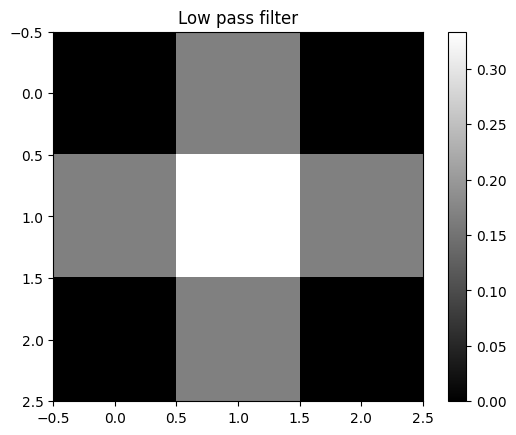

In [4]:
h_low = np.array([[0, 1/6, 0], [1/6, 1/3, 1/6], [0, 1/6, 0]])
filterVisual(h_low, 'Low pass filter')

* Pasa bajos en forma de disco:

In [5]:
def fspecial_disk(radius):
    size = 2 * radius + 1
    h = np.zeros((size, size), dtype=np.float32)
    rr, cc = disk((size // 2, size // 2), radius+1)
    h[rr, cc] = 0.1
    rr, cc = disk((size // 2, size // 2), radius)
    h[rr, cc] = 0.3
    rr, cc = disk((size // 2, size // 2), radius-1)
    h[rr, cc] = 0.5
    rr, cc = disk((size // 2, size // 2), radius-2)
    h[rr, cc] = 0.7
    rr, cc = disk((size // 2, size // 2), radius-3)
    h[rr, cc] = 0.9
    rr, cc = disk((size // 2, size // 2), radius-4)
    h[rr, cc] = 1
    h /= np.sum(h)
    return h

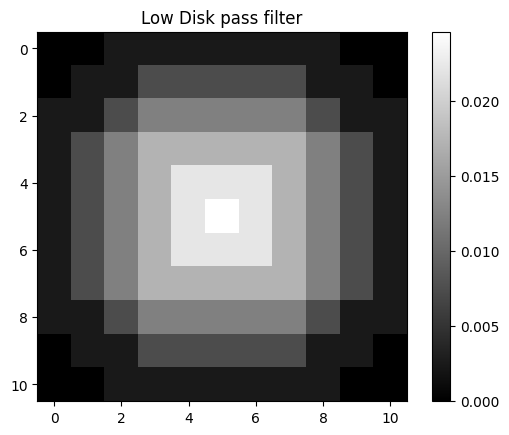

In [6]:
h_lowDisk = fspecial_disk(radius = 5)
filterVisual(h_lowDisk, 'Low Disk pass filter')

* Pasa altos:

In [7]:
def fspecial_unsharp(size, sigma):
    gaussian_kernel = cv2.getGaussianKernel(size, sigma)
    gaussian_kernel = gaussian_kernel @ gaussian_kernel.T
    unsharp_kernel = np.zeros_like(gaussian_kernel)
    unsharp_kernel[size // 2, size // 2] = 2
    unsharp_kernel -= gaussian_kernel
    return unsharp_kernel

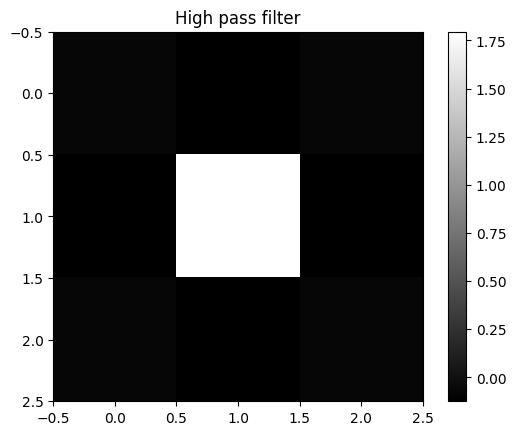

In [8]:
h_high = fspecial_unsharp(size = 3, sigma = 1)
filterVisual(h_high, 'High pass filter')

Construimos una imagen (que es una delta en 0) suficientemente grande para poder bien el espectro.

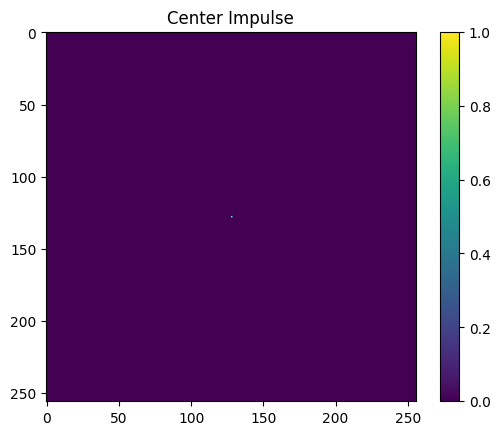

In [9]:
big = np.zeros((N, N))
big[N//2, N//2] = 1

plt.imshow(big)
plt.colorbar()
plt.title("Center Impulse")
plt.show()

Convolucionamos la imagen con los filtros y graficamos el espectro de la imagen filtrada:

In [10]:
def showSpect(src, kernel, title):
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1, 2, 1)
    
    # h1 = cv2.filter2D(src, -1, kernel) # ddepth=-1 keeps src depth
    h1 = convolve2d(src, kernel)
    S = fft.fft2(h1)
    SM = np.abs(S)

    plt.imshow(fft.fftshift(SM / np.max(np.max(SM))), cmap='gray')
    plt.axis('off')
    plt.title(title+' Spectrum')
    
    IMd = np.log(1 + np.abs(SM))

    fig.add_subplot(1, 2, 2)
    plt.imshow(fft.fftshift(IMd / np.max(np.max(IMd))), cmap='gray')
    plt.axis('off')
    plt.title(title+' Log Scale Spectrum')

    plt.tight_layout()
    
    plt.show()

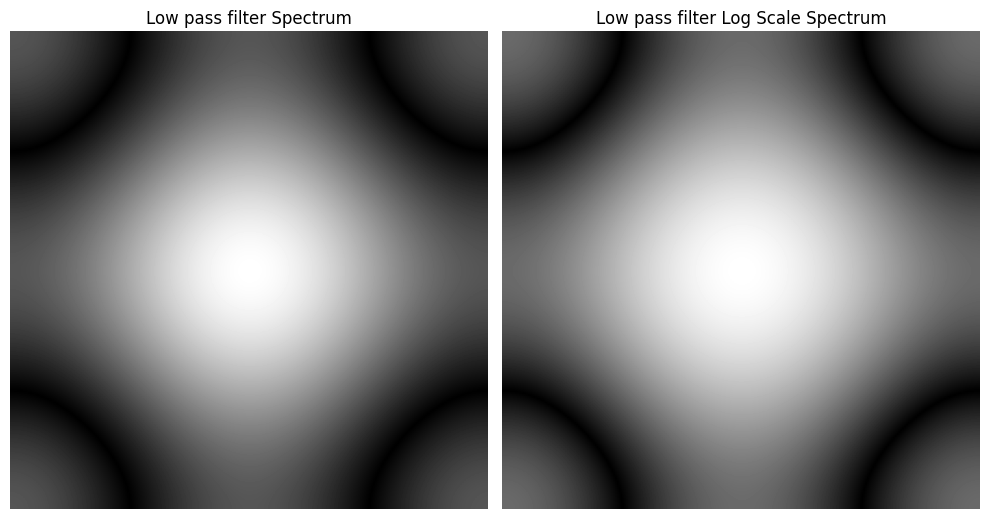

In [11]:
showSpect(src=big, kernel=h_low, title='Low pass filter')

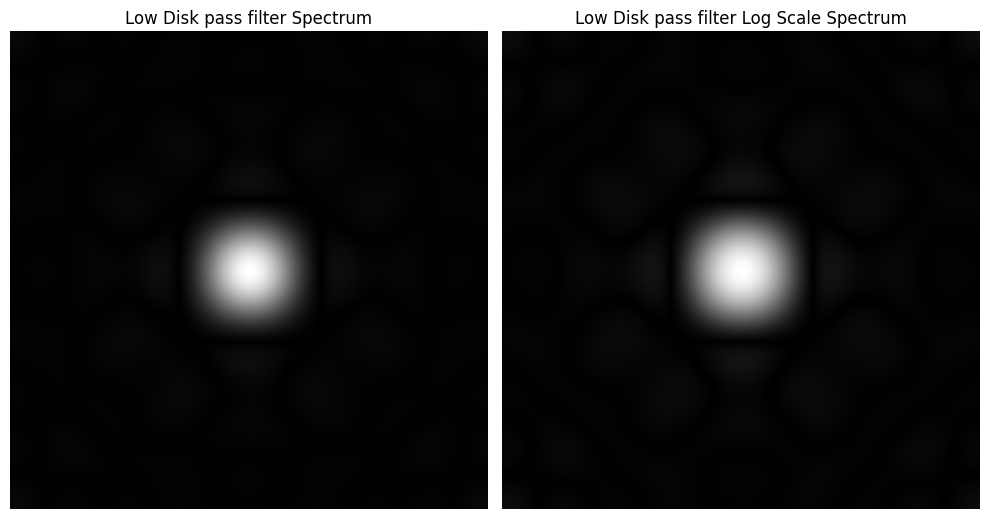

In [12]:
showSpect(src=big, kernel=h_lowDisk, title='Low Disk pass filter')

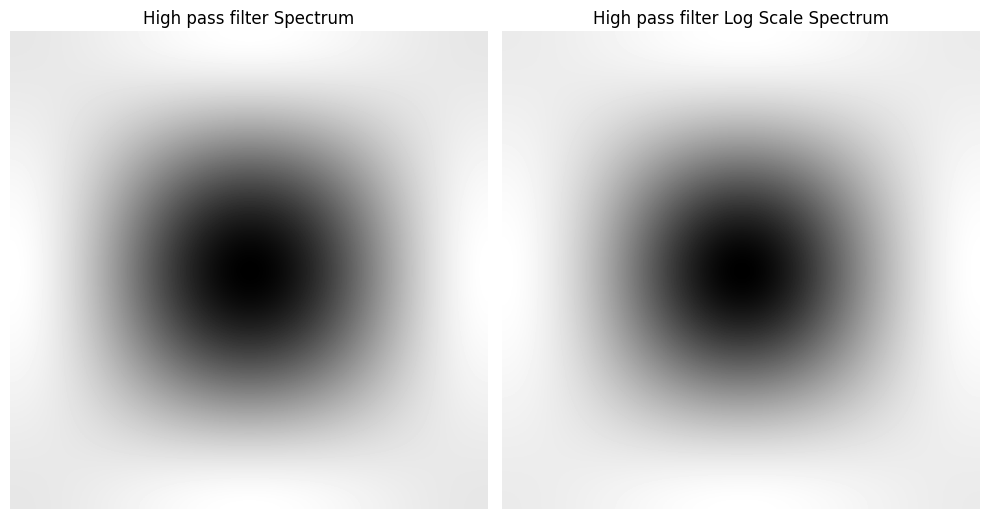

In [13]:
showSpect(src=big, kernel=h_high, title='High pass filter')